<a href="https://colab.research.google.com/github/Sanidhyar10/Intro-to-Data-Science-using-python-/blob/main/EDA_IT2K21_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3: Exploratory Data Analysis

In [ ]:
# Loading required packages and reading in the bank_marketing_training data set as bank_train.
import pandas as pd
bank_train = pd.read_csv("/content/bank.csv")

#Constructing a bar graph with overlay using python

<Axes: xlabel='poutcome'>

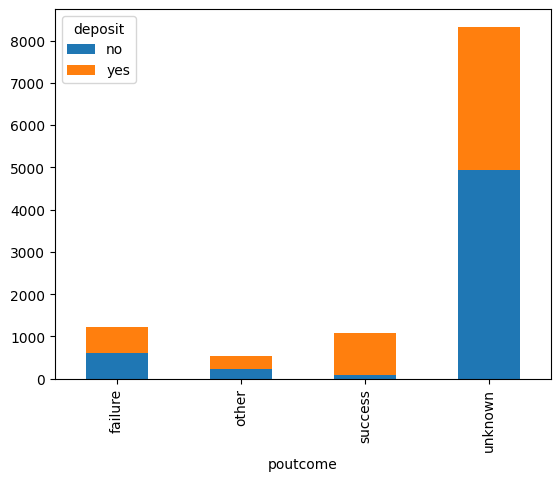

In [ ]:
# First we create a bar graph to create a contingency table of the values in the predictor and target variables.
# Then the table is created using the crosstab() command.
crosstab_01 = pd.crosstab(bank_train['poutcome'], bank_train['deposit'])


# Now, we can create the bar graph based on the table.
crosstab_01.plot(kind='bar', stacked = True)


In [ ]:
# Now in order To create a normalized version,
# we need to change the values in the table so that in each cell the proportions are maintained
# The “no” and “yes” deposit values within each value of the predictor previous_outcome, are as follows:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)

# In our example, we divide the cells in row 1 of the table by the sum of the cells in row 1, and similar process goes on for row 2 and row 3.
# To accomplish this, we first set the value we want to divide by to be crosstab_01.sum(1), which is the sum of each row in the table.

# Once the table is saved, visualize it using the code for a stacked bar chart, as
#  you can see above.
crosstab_norm.plot(kind='bar', stacked = True)

#  How to Construct Contingency Tables Using Python

In [ ]:

crosstab_01 = pd.crosstab(bank_train['poutcome'], bank_train['deposit'])

# Note the order of the variables. The table as built by this code will have poutcome as the rows.
# This table created the bar chart we needed in the previous section,
# but to abide by best practice and have the target variable represent the rows, we need to change the code to:
crosstab_02 = pd.crosstab(bank_train['deposit'], bank_train['poutcome'])

# Make sure to save the table. We save the output as crosstab_02.

# To calculate the column proportions of the table, we need to divide each column by the column sum.
# However, this time we are obtaining column, and not row, percentages.
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)

# Note that we multiply the resulting table by 100 to obtain percentages instead of proportions.


poutcome,failure,other,success,unknown
deposit,,,,
no,49.7,42.8,8.7,59.3
yes,50.3,57.2,91.3,40.7



#  How to Construct Histograms with Overlay Using Python

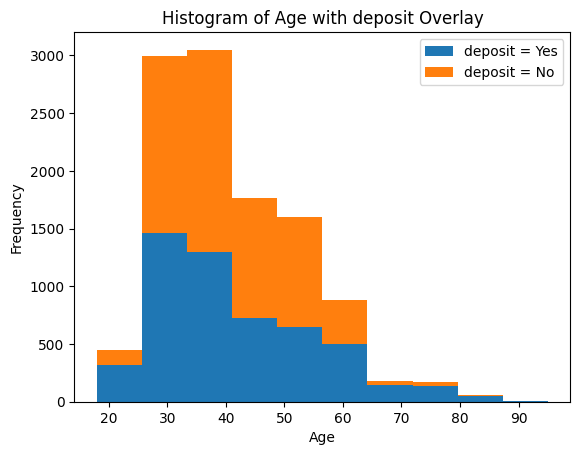

In [ ]:
# Load the required packages.
import numpy as np
import matplotlib.pyplot as plt
# Separate the variable you want to graph by the overlay you want to use.
# Since we are creating a histogram of age using an overlay of deposit,
# we separate the variable age, bank_train[‘age’], by the two values of the variable deposit.
# Save each piece as its own variable.
bt_age_y = bank_train[bank_train.deposit == "yes"]['age']
bt_age_n = bank_train[bank_train.deposit == "no"]['age']

# The result is two variables, bt_age_y and bt_age_n,
# which have age values from only those records which have deposit = “yes” and deposit = “no,” respectively.
# Once the variables are created, create a stacked histogram of the two variables.
plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
plt.legend(['deposit = Yes', 'deposit = No'])
plt.title('Histogram of Age with deposit Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

# For the hist() command, the input stacked = True will stack the two variables, while bins = 10 specifies the number of bins in the histogram.
# The legend(), title(), xlabel(), and ylabel() commands specify the values of the legend, title, x‐axis label, and y‐axis label.
# Finally, show() displays the figure.

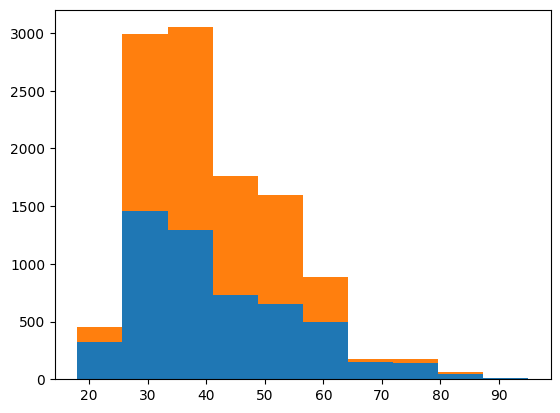

In [ ]:
# We will now create a normalized histogram.
# First, create a stacked histogram,but this time save the information generated by the histogram.
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins =10, stacked = True)

# The left‐hand side of the code saves several pieces of information from the histogram.
# Specifically, n is the height of the histogram bars and bins are the boundaries of each bin in the histogram.
# Note that, since two variables are being plotted in the histogram, n has two series of numbers.
# The first series is for the first variable and the second one is for the second variable.
# The first number in each series is the height of the first bar for each variable.

# To create our normalized histogram, we need to know what proportion of each bin each variable represents.
# To accomplish this, we need to put the information contained in n into a matrix and obtain the column proportions.
# To begin construction of the matrix, combine the heights of the two variables’
# bars into one array using the column_stack() command.
n_table = np.column_stack((n[0], n[1]))

# The result, n_table, is a two‐column matrix where each column’s entries hold the heights of each bar.
# To calculate what proportion of the bar is accounted for by each variable,
# we need to divide each row by the sum across that row.
n_norm = n_table / n_table.sum(axis=1)[:, None]

# Now, each row in n_norm sums to one and the columns within each row give the proportion of that variable that makes up the row.

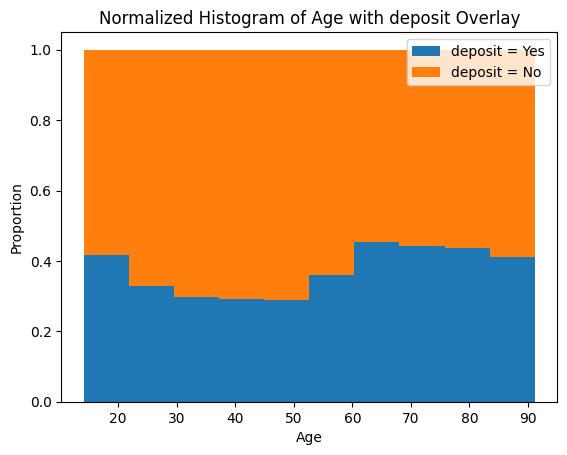

In [ ]:
# In our final preparatory step, we create an array whose rows are the exact cuts of each bin.
ourbins = np.column_stack((bins[0:10], bins[1:11]))

# Each row in ourbins gives the upper and lower bounds of each bin.
# Now, we are ready to create our normalized histogram.
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0],  width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0])
plt.legend(['deposit = Yes', 'deposit = No'])
plt.title('Normalized Histogram of Age with deposit Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()

# In the bar() commands, the x input specifies the upper and lower bounds of the bins,
# the height input uses the normalized count values we created previously
# to specify the height of each of the two sections of each bar,
# and the width input reuses the bar widths from the original bar chart.
# The bottom = n_norm[:,0] input in the second bar() command
# specifies the second of the two bar sections to start on top of the first.
# The remaining commands are the same customization options we used in the stacked bar chart previously.

#  How to Perform Binning Based on Predictive Value Using R/Python

<Axes: title={'center': 'Bar Graph of Age (Binned) with deposit Overlay'}, xlabel='age_binned'>

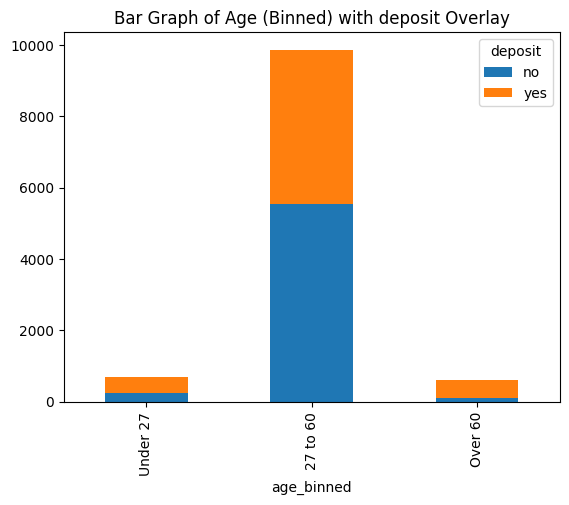

In [ ]:
# Load the required package.
import pandas as pd
# Bin the values using cut() from the pandas package.
bank_train['age_binned'] = pd.cut(x = bank_train['age'], bins = [0, 27, 60.01, 100], labels=["Under 27", "27 to 60", "Over 60"], right =False)
# The x = input specifies the variable that you want to divide into categories.
# The bins = input specifies the edges of each bin. The labels = input specifies the bin label.
# The right = False input specifies that we want our bins to exclude the right‐ hand cutpoint.
#  For example, the first bin will include all ages from 0 up to (but  excluding) 27years old.
# We save the new categorical variable in the data set under the name age_binned by using bank_train[’age_binned’].
# Note that, while we have mostly intuitive cutpoints for the bins,
# such as zero for the lower bound of the first bin and 100 for the upper bound of the last bin,
# we also have a cutpoint of 60.01. Specifying a cutpoint of 60.01 (or any number between but excluding 60 and 61),
# combined with the input right = False, will ensure that our middle category includes all ages from 27 to 60 inclusive.
# Specifically, we tell Python to make a bin from 27 up to but excluding 60.01.
# Since ages are integers in this data set, this effectively makes the bin include ages 27–60, inclusive.
# To graph the binning with an overlay of deposit, create the necessary contingency table and plot it, using code similar to code we used earlier.

crosstab_02 = pd.crosstab(bank_train['age_binned'],bank_train['deposit'])
crosstab_02.plot(kind='bar', stacked = True,title = 'Bar Graph of Age (Binned) with deposit Overlay')
# To create a normalized bar graph, follow the same guidelines as discussed previously.
# To obtain a contingency table of the deposit variable and our new categorical variable, use the crosstab() command.
# Remember to use the target variable deposit as the rows of the table.
# To obtain the table of column proportions, use the div() and sum() commands on the resulting table.
# We discussed this code earlier when creating histograms using Python.